# Fitting models to data

## Recap

We're way past the point of no return in becoming meaningful users of computers!  Just check out this non-exhaustive list of basic skills that we've covered:
- basic mathematical operations
- iteration and recursion with loop control structures `for` and `while`
- keeping track of variables outside of loops (i.e., counting and summing)
- function definition and using functions *inside* of loops
- conditionals with `if`, `else`, and `elif`
- types: `int`, `float`, `string`
- containers such as `list` and `dict`
- randm number generation
- accessing and iterating over elements in lists and dicts
- file I/O
- basic (and semi-advanced) data visualization: histograms, scatter plots, higher-dimensions in 2-d

**Wow**, that's a LOT of stuff.  

***

## Motivation

In this lesson we'll cover an extremely powerful and potentially opaque tool: curve fitting.  Before we look at how it works, let's consider some applications.

- Measurement of the temperature of the cosmic microwave background (CMB) radiation by COBE, evidence for the Big Bang.  [Nice description here, fit is in the middle of the page](https://www.astro.ucla.edu/~wright/CMB.html#:~:text=The%20CMB%20has%20the%20spectrum,opaque%20and%20non%2Dreflective%20object.)
- Hubble's diagram, more evidence of the Big Bang (ca. 1929)!  [Nice article here with modern measurements.](https://www.pnas.org/doi/10.1073/pnas.2536799100#fig3)
- Discovery of the Higgs Boson by CMS and ATLAS experiments (2012).  [Nice description here.](http://scholarpedia.org/article/The_Higgs_Boson_discovery)  [High-res graphs with fits here.](http://www.scholarpedia.org/article/File:Fig_10_ATLAS_CMS_gg_combined.png)
- White House CEA modeling predicts Covid-19 deaths go to 0 by 15 May 2020.  [Source.](https://twitter.com/WhiteHouseCEA45/status/1257680258364555264?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1257680258364555264%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.vox.com%2F2020%2F5%2F8%2F21250641%2Fkevin-hassett-cubic-model-smoothing)  [Business Insider commentary.](https://www.businessinsider.com/trump-advisor-kevin-hassett-excel-function-cubic-model-coronavirus-2020-5)  [Vox commentary.](https://www.vox.com/2020/5/8/21250641/kevin-hassett-cubic-model-smoothing)

* * *

## Fitting/model optimization as an idea

In Lesson 4 we discussed how data visualization can help help us to turn data into understanding.  "Understanding" in this sense means something like a *qualitative understanding* of the data.  

Today, we'll look at a method for turning data into quantitative results: fitting functions to data, sometimes called "model optimization".  This is an indispensible skill/technique in the physical sciences, and it's something that you've probably done many times using Excel or Logger Pro.  

Here is the basic idea: Often in the physical sciences, we have data that we believe should be described by some quantitative model.  For example, the data might be vertical position *vs* time measurements for a projectile, and we might assume that this data is described by one of the kinematic equations: 

\begin{equation}
y(t) = \frac{1}{2}a_{y}\;t^2 + v_{0y}\;t + y_0
\end{equation}

This function is our *model* and it is typically the consequence of some underlying physical law (in this case, N2L).  The goal of *fitting the model to the data* is to determine the values of the physical parameters in the model that make the model *best characterize the data*.  For the kinematic model above, this means determining the optimal values of $a_y$, $v_{0y}$, and $y_0$.  We call these the "fit parameters" because they are the quantities that we will vary in order to fit the model to the data.  

When we fit the model to the data, we should get optimal values for the fit parameters and their associated uncertainties.  These are the derived measurements of physical quanties -- the results of our analysis!  If we continue with the projectile example, these results might include a measurement of the local acceleration due to gravity (and associated uncertainty).

If you've done fitting in Excel or LoggerPro, you know that there's a toolkit for doing this that proves a handfull of functions/models that the software is decent at fitting -- these are functions like polynomials, exponentials, *etc.*  These tools built into Excel are pretty weak, though.  What if we need a function that Excel doesn't offer?  What the heck does $R^2$ mean?  What if my data has non-uniform uncertainties?  How do I know the uncertainty on the fit parameter values?

Python (and other languages) have modules or libraries that do fitting, as well.  These modules are *much* more powerful and general than what you'll find in Excel, but this power comes at the cost of having to learn some new syntax and concepts. 

***

## Fitting bivariate data, the basics

Let's get started with the simplest meaningful fitting exercise: fitting a linear model to bivariate data.  The file `spring_stretch.csv` contains stretch distance ($x$) and spring force ($F$) data for the stretching of a spring.  We want to use this data to measure the spring constant.  For a spring that obeys Hooke's Law, the two variables are related by 

\begin{equation}
F_x = k x
\end{equation}

where $k$ is the spring constant.  Let's look at the data first:

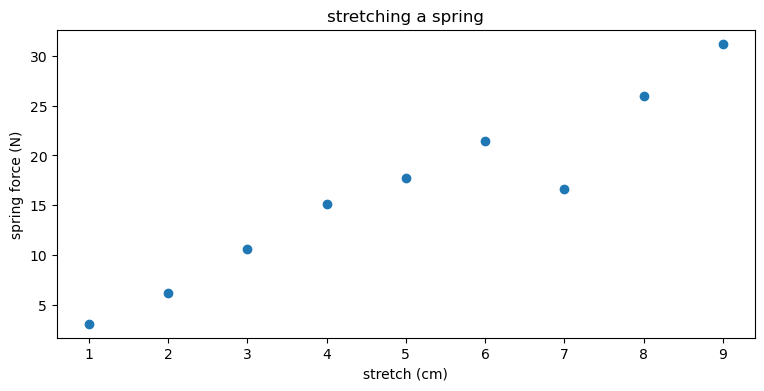

In [1]:
# from rich import print # if you're able to install rich, I recommend doing so!
import numpy as np
import matplotlib.pyplot as plt
fil = open('data_files/spring_stretch.csv','r')
xs, fs, = [], []

lin = fil.readline()
lin = fil.readline()
while len(lin) > 1:
    lin_arr = lin.split(',')
    xs.append(float(lin_arr[0]))
    fs.append(float(lin_arr[1]))
    lin = fil.readline()
fil.close()

fig = plt.figure(figsize=(9,4))
plt.plot(xs, fs, 'o')
plt.xlabel('stretch (cm)')
plt.ylabel('spring force (N)')
plt.title('stretching a spring')
plt.show()

Ok, looks great.  Except for the point at $x \approx 7.0$ cm, the data certainly *look* like they follow a linear trend.  We should expect that our linear model will work.  We now endeavour to fit a model to this data.  We first define a function that corresponds to our model:

In [2]:
def linear_function(x, m, b):
    return m * x + b

Notice that the arguments of this function include both the independent variable ($x$) and the slope ($m$) and intercept ($b$).  We have to make the latter two arguments becuase the fitting code will **vary** their values and determine how the function changes (so they're variables in a way).

The `scipy` (scientific python) `optimize` module contains the `curve_fit` function that we will use to... ya know, fit the curve to the data:

In [3]:
from scipy.optimize import curve_fit

spring_popt, pcov = curve_fit(linear_function, xs, fs, p0 = [3.4, 0])

ModuleNotFoundError: No module named 'scipy'

That's basically all there is to it!  The first three arguments of `curve_fit` are the function that we want to optimize and the two lists containing the data (independent and dependent variables).  The last argument, `p0`, is a set of initial guesses of the fit parameter values.  Our function has two fit parameters ($m$, $b$), so I supply a list of two values.  These values give `curve_fit` somewhere to begin its fitting process.  For simple models like this, the initial parameter values aren't super important, but for more complicated models/data, tuning these parameters can make or break the fit.

When we call `curve_fit` it produces outputs -- I've stored these as `spring_popt` and `pcov`.  As such, `spring_popt` is a list of the **optimal parameter values**, *i.e.* the values of the model paramter that make the model best describe the data.  `pcov` is the **covariance matrix**, a complicated object that tells us about the uncertainties in the optimal fit parameter values (more on this below).

We can print out `spring_popt` to see the optimal fit parameter values:

In [ ]:
print(spring_popt)

So, our optimal slope is $\approx 3.170$ and the optimal vertical intercept is $\approx 0.607$.  If we compare these to the HL model, we could conclude that the sprink has a spring constant of $k \approx 3.170$ N/cm.  (Note that I'm being cagey about the equal signs for now...)

Let's take a look at the optimized function plotted with the data.  We'll need to create a set of points to graph.

In [ ]:
xrange = np.linspace(1, 9, 101)
f_model = linear_function(xrange, spring_popt[0], spring_popt[1])

fig = plt.figure(figsize=(9,4))
plt.plot(xs, fs, 'o', label='data')
plt.plot(xrange, f_model, '-r', label='fit function')
plt.xlabel('stretch (cm)')
plt.ylabel('spring force (N)')
plt.title('stretching a spring')
plt.legend()
plt.show()

#### Warm-up problem 

You may have noticed that `linear_function` isn't a perfect match for the Hooke's Law model -- the function contains a constant term, while HL does not!  Re-do the fit with a function that better matches Hooke's Law.  Make a graph of the data and the two optimized fit functions.

In [ ]:
# warm-up code goes here!

Most of what we'll do below is not much more complicated than this.  If you can wrap your mind around the basic pieces of fitting, everything else we'll do is just slight variations here and there.

***

## Fitting to binned 1-d data (histograms)

Next, let's look at some one-dimensional data.  `heights.txt` is a simple data file that contains the height measurements (in cm) for members of some group of humans.  Let's read in the data and make a histogram to get a feel for the data.

In [ ]:
fil = open('data_files/heights.txt','r')
harr = []

lin = fil.readline()
while len(lin) > 1:
    harr.append(float(lin))
    lin = fil.readline()

fig = plt.figure(figsize=(9,4))
bin_values = plt.hist(harr,bins=110,range=[110,220])
plt.xlabel('heights (cm)')
plt.show()

Cool!  So, as we would expect, the data appear to be distributed according to a gaussian (or bell curve), possibly with some "funky stuff" happening on the low-end (left) tail.  

Notice that I set `bin_values` equal to the output of the histogramming step above.  We'll use this below.  This output is a list containing two lists!  The first list contains the numbers of events in each bin (I'll call them the "occupancies").  The second list contains the bin edge values.  Let's take a look:

In [ ]:
print(bin_values[0])
print(bin_values[1])
print()
print('There are ' + str(len(bin_values[0])) + ' elements in the occupanices list.')
print('There are ' + str(len(bin_values[1])) + ' elements in the edges list.')

Take a good look at the values in these lists and compare to the histogram above.  Make sure that you understand this before moving on!

Now, what we wish to do is fit a function to the histogram.  Even though the data was 1-dimensional, *binning* the data into a histogram creates a 2-d visualization.  We will fit a 1-d function to this 2-d information.  We'll treat the horizontal axis (heights) as the independent variable and the vertical axis (bin occupancies) as the dependent variable.

OH SNAP!  The bin edges list has one more element than the bin occupancies array; we need to fix this in order to fit!  We'll use the bin edges list to create a list of the bin centers by averaging the left and right edges for each bin:

In [ ]:
bin_occs = bin_values[0]
bin_edges = bin_values[1]
bin_centers = []
for i in range(len(bin_occs)):
    bin_centers.append(0.5*(bin_edges[i] + bin_edges[i+1]))
    
print(bin_centers[0:10])
print(len(bin_centers))

Make sure you understand what's going on in the loop in the previous cell!  It's compact, but you know how to read it.

Let's visualize the bin center and occupancy data with a quick graph:

In [ ]:
fig = plt.figure(figsize=(9,4))
plt.scatter(bin_centers, bin_occs)
plt.xlabel('bin centers (cm)')
plt.ylabel('bin occupancies')
plt.show()

If that just looks like the profile of our histogram from above... good eye!  It is.  We've just graphed the data in a way that is obviously 2-d.

To *characterize* the data, we'll fit a gaussian function to the data using `curve_fit` from `scipy.optimize` again.  The *process* is exactly the same as it was above for the linear function, but we will need to change some of the details of the fit.
  
In this case, we suspect that the data can be described by a gaussian function with the following form:

\begin{equation}
g(h) = a \exp \left[ - \frac{(h-\mu)^2}{2\sigma^2} \right]
\end{equation}

Again, "fitting" means that we want to find the values of parameters $a$ (scale), $\mu$ (mean), and $\sigma$ (width) that make the gaussian a good description of the number of data in each of our bins as a function of the bin center ($h$).
WE supply the functional form, but `scipy` finds the best values for the fit parameters $a$, $\mu$, and $\sigma$.

Let's DO IT!

In [ ]:
# first, we'll define our gaussian function
def single_gauss(h, a, m, s):
    return a * np.exp(-(h - m)**2 / 2.0 / s**2)

# then we'll call curve fit.  Notice the initial parameter values supplied in p0
gauss_popt, gauss_pcov = curve_fit(single_gauss, bin_centers, bin_occs, 
                                   p0=[500, 170, 20])

print(gauss_popt)

Just as above, `curve_fit` finds the optimal values of the fit parameters and returns these optimal values as the list which we call `popt`.  I printed out the optimal values at the end of the previous block.

The last argument that I supplied to `curve_fit` is the array of starting values for the fit parameters.  I guessed these values by looking at the histogram.  These don't *need* to be supplied, but it makes `scipy`'s optimization job a lot easier to have some good starting values.

Let's now plot the optimized fit function and *visually* inspect how good the fit is.

In [ ]:
## use the function and the optimal parameter values to predict the bin occupancies
fcn_vals = single_gauss(bin_centers, gauss_popt[0], gauss_popt[1], gauss_popt[2])

fig = plt.figure(figsize=(9,4))
plt.hist(harr, bins=110, range=[110,220])
plt.xlabel('heights (cm)')

plt.plot(bin_centers,fcn_vals,"r-") # plot the predictions as a red line
plt.show()

Wow!  That looks pretty... um... well, it looks *okay*.  That funky lower tail is bugging me.  Let's construct a more general function that is a sum of two gaussians to try to fit both contributions.  We can use the same procedure as before:

In [ ]:
# create a function that tis the sum of two gaussians...
# more parameters means more freedom to fit the data
def double_gauss(h, a1, m1, s1, a2, m2, s2):
    g1 = a1 * np.exp(-(h - m1)**2 / 2.0 / s1**2)
    g2 = a2 * np.exp(-(h - m2)**2 / 2.0 / s2**2)
    return g1 + g2

# fit the new function to the data
# need to supply twice as many initial parameter values
dgauss_popt, dgauss_pcov = curve_fit(double_gauss, bin_centers, bin_occs, 
                                     p0=[500, 170, 20, 100, 150, 10])

print(dgauss_popt)

# make predictions with the new function
fcn2_vals = double_gauss(bin_centers, 
                         dgauss_popt[0], dgauss_popt[1], dgauss_popt[2], 
                         dgauss_popt[3], dgauss_popt[4], dgauss_popt[5])

## let's plot them all together now!
fig = plt.figure(figsize=(9,4))
plt.hist(harr, bins=110, range=[110,220], alpha=0.4)
plt.xlabel('heights (cm)')

plt.plot(bin_centers,fcn_vals,"r--",linewidth=3) # plot the single-gaussian predictions
plt.plot(bin_centers,fcn2_vals,"g--",linewidth=3) # plot the double-gaussian predictions
plt.show()

The green curve is our double-gaussian distribution.  NOW **THAT'S** A FIT.  WOO WOO.

What can we learn from this?  Well, if this were REAL data, we would probably hypothesize that our population consists of two sub-populations: a larger group with mean height of 173.29 cm and a smaller group with mean height of 141.55 cm.  Maybe the population being catalogued here is all of the people at an ENORMOUS middle-school PTA meeting -- the taller group is adults and the shorter group is smaller number of middle-school kids who were dragged along for the ride.

****

## Gut check

So.  Why in the WORLD would someone go to all of the trouble of writing code like this to do something that Excel or Mathematica or LoggerPro could do with just a few mouse clicks?  Here are some reasons that I think are important:

#### 1. Power and flexibility

The approach outlined above allows the user to fit *any* function to any dataset, and has many other built-in flexibilities.  It's POWERFUL.  This may not seem like a big deal, but as you work with more-sophisticated data, Excel and Logger Pro's built-in functions just won't cut it.  LoggerPro has no option for a sum of two gaussians.  Don't even ask about Excel.  In addition, you can do things like place bounds on the parameters ("don't let the mean get bigger than 1.2") and you can fit multiple subranges of the dataset.  These modules are designed by data scientists -- if you have a specific need, chances are good that a python developer thought of it a long time ago.

#### 2. Modularity and scalability 

If you write the code once, you can apply it to *many* datasets very quickly.  Let's say that I now gave you thirty more datasets to fit as above.  You could simply put all of this code inside of a loop over the data file names and let this one program structure automate the fitting for all of the datasets.

#### 3. Data uncertainties 

More sophisticated techniques like this allow you to handle uncertainties on your data points.  These experimental uncertainties affect fits!  If a single data point has a very small uncertainty, then the fit should "feel" obligated to match the fuction to that point as closely as the other points.  We'll demonstrate this later.

#### 4. Parameter uncertainties

The fitting techniques above provide quantites like the fit-parameter uncertainties.  This leads to a better scientific understanding of whatever you're studying.

When you fit a function with, *e.g.*, Excel, the software tells you what the "optimal" values of the fit parameters are, but it does not give the uncertainties on these parameters.  What does this mean?  Well, when we fit data with a function, we're trying to determine the values of the fit parameters that make the function as close to the data points as possible.  In many cases "as close as possible" is ambiguous; if we change the value of the first parameter, the function may get farther from one data point but closer to another.  Thus, there's an inherent uncertainty in the value of the fit parameter returned by the fitting algorithm.  This is just like how we use an experimental uncertaintly to mean (roughly) "we're confident of the value of this quantity to within $\pm \sigma$".

***

## Extracting fit parameter uncertainties

Here is how to extract these uncertainties.  First, I'll refit that double gaussian from the previous example.  Notice that there are two outputs from the `curve_fit` operation.  The first is the optimal values of the fit parameters (I call it `dgauss_popt`).  Let's look at the second, `dgauss_pcov`:

In [ ]:
dgauss_popt, dgauss_pcov = curve_fit(double_gauss, bin_centers, bin_occs, 
                                     p0=[500, 170, 20, 100, 150, 10])
print(dgauss_pcov)

Barf!  What is this?  This is a 6x6  (note that there are 6 fit parameters) matrix called the **covariance matrix**, and it stores all of the uncertainty information from the fit.  [The Wikipedia entry for covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) is pretty deece!

What you need to know is that the covariance matrix stores information about uncertainties in and correlations between the fit parameters.  The latter of these is not necessary for us right now.  However, the former is what we want.  The diagonal elements of the covariance matrix are the squares of the (1 standard deviation) parameter uncertainties!  So for fit parameter $p_i$,

\begin{equation}
\sigma_i = \sqrt{pcov2_{ii}}
\end{equation}

Said in words, the uncertainty of the $i^{th}$ fit parameter is the $(i,i)$ element of the covariance matrix (an element on the diagonal).  If you're comfortable with matrices, you might picture the covariance matrix as something like this:
\begin{equation}

pcov2 = \begin{bmatrix} 
    \sigma^{2}_{11} & ? & ? & \dots & ? \\
    ? & \sigma^{2}_{22} & ? & \dots & ? \\
    ? & ? & \sigma^{2}_{33} & \dots & ? \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\ 
    ? & ? & ? & \dots & \sigma^{2}_{nn} 
    \end{bmatrix}
\qquad
\end{equation}

Let's make a list of these uncertainties and the print out our extracted fit results.  Note that I've been carefult to not use the term "results" until we had these uncertainties!

In [ ]:
dgauss_popt_sigs = []
for i in range(len(dgauss_popt)):
    dgauss_popt_sigs.append(np.sqrt(dgauss_pcov[i][i])) # grab the element from dgauss_pcov
                      
    print("fit parameter " + str(i) + ":\t" + str(dgauss_popt[i]) + "\t +/- "
                                            + str(dgauss_popt_sigs[i]))

So, we can now answer questions like: What is the mean height of the taller sub-population?  Well, it's 

$$
  m_1 = (173.30 \pm 0.09)\textrm{ cm}
$$  

My fit says so!

Now, not all of these digits are significant, but we could amend the code to only output two decimal places should we wish.

****

## Fitting data with uncertainties

Let's return to fitting bivariate data.  This time, we'll consider the error bars on the data points.  The block of code below graphs the linear spring-stretching data that we used at the top of this notebook.

In [ ]:
fil = open('data_files/spring_stretch.csv','r')
xs, fs, xerrs, ferrs = [], [], [], []

lin = fil.readline()
lin = fil.readline()
while len(lin) > 1:
    lin_arr = lin.split(',')
    xs.append(float(lin_arr[0]))
    fs.append(float(lin_arr[1]))
    xerrs.append(float(lin_arr[2]))
    ferrs.append(float(lin_arr[3]))
    lin = fil.readline()
fil.close()

fig = plt.figure(figsize=(9,4))
plt.errorbar(xs, fs, xerr=xerrs, yerr=ferrs, fmt='.')
plt.xlabel('stretch (cm)')
plt.ylabel('spring force (N)')
plt.title('stretching a spring')
plt.show()

We see now that the data points have varying uncertainties -- in particular that wonky-looking point at $x \approx 7$ cm has a lerger error bar than the other points.  When we do a fit, our fit should try less hard to match this data point because its value is less certain!  This can be done by supplying the uncertainty values to `curve_fit`.  

Note that we're only going to supply the uncertainties in the force, not the uncertainties in distance.  Doing both requires more sophisticated methods (which `scipy` has, but we'll ignore).

In [ ]:
def linear_func_error(x, m, b):
    return m * x + b


spring_popt2, spring_pcov2 = curve_fit(linear_func_error, xs, fs, 
                                       sigma=ferrs, p0=[3.4, 0.0])

print(spring_popt2)

f2_model = linear_func_error(xrange, spring_popt2[0], spring_popt2[1])

fig = plt.figure(figsize=(9, 4))
plt.errorbar(xs, fs, xerr=xerrs, yerr=ferrs, fmt='.')
plt.plot(xrange, f_model, '-m', label='fit function w/o errors')
plt.plot(xrange, f2_model, '-g', label='fit function w/ errors')
plt.xlabel('stretch (cm)')
plt.ylabel('spring force (N)')
plt.title('stretching a spring')
plt.legend()
plt.show()

print("The optimal spring constant value is (" 
      + str(round(spring_popt2[0],4)) 
      + " +/- " + str(round(np.sqrt(spring_pcov2[0][0]),4)) + ") N/cm")

Wow, very sophisticated.  I've plotted both the previous fit function (that ignored errors, magenta) and the new fit function (green).  Notice that they're not the same!!!  The new fit function is a bit higher because it doesn't try to match that wonky point at $x \approx 7$ cm.

***

## In summary

There is a large amount of detail that we're skipping here, because it's outside the scope of the course course.  Most of this detail is related to how `scipy` judges whether a fit is "good" and how it knows how to vary the parameter values to improve the fit.  PhD theses have been written (and continue to be written) about this procedure.  Suffice to say that: 
- `curve_fit` doesn't just "eyeball" the fit -- it uses an algorithmic process for optimizing fit parameters.  The process relies on a quantification of the difference between the function and each datapoint, and `curve_fit` knows how to wiggle parameter values to make this quantity as small as possible.
- the results for modest datasets and simple-ish functions are pretty robust.  You could vary the parameter initial values in the fits above and get the same optimal fit parameters (with negligibly small variations)

***

## Problems

Your homework is to complete **two** (2) of the following problems.

### Regulars 

1. The file `parab_t_and_y_error.csv` contains vertical position and time measurements of a projectile.  Fit the data in this file with the kinematic equation model given in section III of this notebook.  From this fit, extract the vertical acceleration and its associated uncertainty.  Is this value consistent with $g = 9.80$ m/s$^2$?  Write a block of markdown to explain what you did and your results.
1. Return to the NBA data (again???) from a few lessons back.  Make a histogram of the half-time point differential (team2 - team1).  Configure the histogram to have 1-point-wide bins.  Fit a gaussian to this histogram to extract the mean point differential (and its uncertainty) and the standard deviation.  Does the gaussian function look like it adequately characterizes the data?  Now make a histogram of the final point differential.  Comment on whether a gaussian function would be a good description of the data.  If not, why not???  Write a block of markdown to explain your process and your results.  
1. The file `wash_pa_temps_only.csv` contains the temperature maxes and mins per day for the years 2000-2009 in Washington, PA.  Over 3500 data points!  Make a graph of the maximum temp versus day number.  Fit this data with a function of the following form: 
\begin{equation}
T(t) = A\cos\left( \omega t + \phi\right) + B
\end{equation}
This function has four fit parameters: $A$, $\omega$, $\phi$, and $B$.  Make sure you supply good initial guesses for these parameters.  Use your values of $\omega$ and $B$ returned by the fit to estimate the length of the year.  Also estimate the average **annual** temperature from your fit parameters. (Note: It is likely that the biggest problem that you'll have is determining "good" initial parameter values.  Think very hard about what type of quantity $\omega$ is and how it relates to the length of a year.)

### Mega-Meanies, free-candy edition
4. You and a partner will be given a number of small (so-called "fun size" [*sic*]) bags of Skittles. Your job is to characterize the number **yellow** Skittles in an average fun-size bag (FSB).  Open **each** of the FSBs and count the total number of Skittles and the number of yellow Skittles in each.  Enter this data into a csv file, where each row represents a single FSB.  Then, write `python` code that plots separate histograms of the totals and the numbers of yellows.  Your histograms should be configured to have 1-unit-wide bins.  It is likely that this dataset will be described by the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).  In this application, the Poisson distribution tells us the that the probability of finding $k$ yellows in an FSB is given by 
\begin{equation}
\textrm{Pr}(k) = A\frac{\lambda^{-k}e^{\lambda}}{k!}
\end{equation}
where $\lambda$ is the "expected value" of the number of yellows in each FSB and $A$ is a scale factor that will make fitting easier.  Fit this function to the histogram for yellows to extract the expected number of yellows per FSB.  Write a block of markdown to explain your process and your results.  (Note: If you want to do this exercise, you need to tell me by Thursday evening so that I can acquire Skittles.)
4. (BONUS) Now fit a Poisson PMF to the distribution of total Skittles in an FSB. Use your your results from this and the previous problem to estimate the probability that a bag will be all yellows.
4. Get the file `cobe_cmb_data.txt` from Sakai.  This file contains the data represented in the CMB first item of Section II of this notebook.  The first column of data in this file represents the oscillations of light per cm; you will have to do a simple calculation to convert this to either a wavelength or a frequency.  Look online for a functional form of the black-body spectrum. Fit this functional form to the data and extract the temperature of... the Universe!